[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


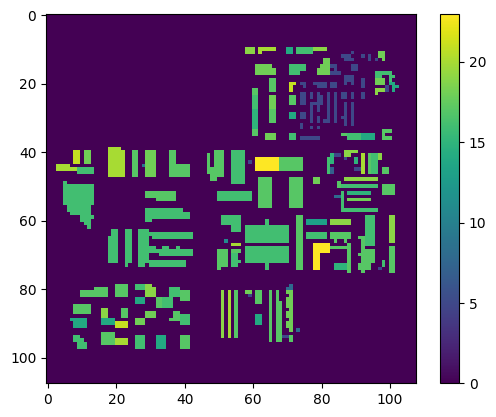

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt


res_plane_0 = np.load("/dev/shm/res_plane/Bl_building_npy/400_caf77b0f-f21d-4dbd-a721-0c9f1ac59f3e.npy")
plt.imshow(res_plane_0)
plt.colorbar()
print(res_plane_0[-1])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


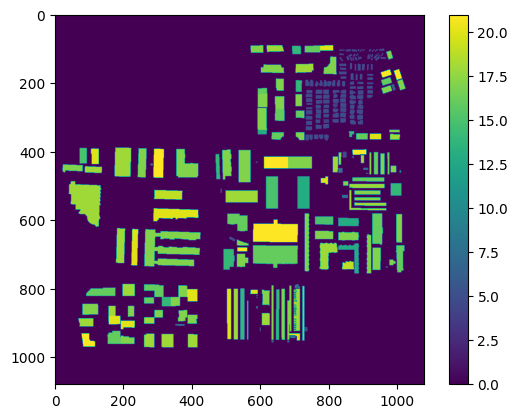

In [12]:
res_0 = np.load("/home/yl826/3DPathLoss/nc_raytracing/res/Bl_building_npy/400_caf77b0f-f21d-4dbd-a721-0c9f1ac59f3e.npy")
plt.imshow(res_0)
plt.colorbar()
print(res_0[-1,0:200])

In [13]:
def get_data_from_HeightFile(f_ptr_height):
    try:
        lines = f_ptr_height.readlines()
        line = lines[0]
        line = line.replace('(', '')
        line = line.replace(')', '')
        line = line.replace('\n', '')
        line = line.split(',')
        f_name = line[-1]
        line = line[0:-1]  # disregard FileName
        # file format: (minLon, maxLat, maxLon, minLat), building_to_area ratio, height, name
        minLonOut, maxLatOut, maxLonOut, minLatOut, percent, height = [float(l) for l in line]
        return minLonOut, maxLatOut, maxLonOut, minLatOut, percent, height, f_name
    except Exception as e:
        raise e

In [74]:
BASE_PATH = '/dev/shm/res_plane/'
f_names_xml = [f for f in os.listdir(BASE_PATH + 'height_at_origin/')
            if os.path.isfile(BASE_PATH + 'height_at_origin/' + f)]


In [75]:
# print(f_names_xml[0:30])

In [ ]:
orig_height_arr = []
height_at_origin_file_name_list = []
for fname in f_names_xml:
    _,_,_,_,_, height_at_origin, file_name = get_data_from_HeightFile(open(BASE_PATH + 'height_at_origin/' + fname, 'r'))
    # print(height_at_origin)
    orig_height_arr.append(height_at_origin)
    # print(file_name, height_at_origin)
    building_height_npy = np.load(BASE_PATH + 'Bl_building_npy/' + file_name + '.npy'  )
    # print(building_height_npy[54:58,54:58])
    # print(np.sum(building_height_npy))
    if np.max(height_at_origin) > 0.0:
        print(np.max(height_at_origin),file_name )
        height_at_origin_file_name_list.append(file_name)
print(np.sum(orig_height_arr))

In [107]:
def generate_coverage_map_config_combination():
    
    
    
    """
    ----------
    ----------
    --TX----TX--
    ----------
    ----------
    ----TX-----
    ----------
    ----------
    --TX----TX--
    ----------
    """
    tx_xy_position = [[0,0], [-200,200], [-200,-200], [200,200], [200,-200]]
    tx_height = [5, 10, 15]
    
    cm_conf_dict = []
    for xy in tx_xy_position:
        for height in tx_height:
           
            cm_conf_dict.append([*xy,height])
    
    print(cm_conf_dict)
    return cm_conf_dict

In [108]:
generate_coverage_map_config_combination()

[[0, 0, 5], [0, 0, 10], [0, 0, 15], [-200, 200, 5], [-200, 200, 10], [-200, 200, 15], [-200, -200, 5], [-200, -200, 10], [-200, -200, 15], [200, 200, 5], [200, 200, 10], [200, 200, 15], [200, -200, 5], [200, -200, 10], [200, -200, 15]]


[[0, 0, 5],
 [0, 0, 10],
 [0, 0, 15],
 [-200, 200, 5],
 [-200, 200, 10],
 [-200, 200, 15],
 [-200, -200, 5],
 [-200, -200, 10],
 [-200, -200, 15],
 [200, 200, 5],
 [200, 200, 10],
 [200, 200, 15],
 [200, -200, 5],
 [200, -200, 10],
 [200, -200, 15]]

In [127]:
def compute_min_height(cm_conf_dict, file_path):
    building_npy = np.load(file_path)[4:104,4:104]
    print("max",np.max(building_npy))
    print(cm_conf_dict)
    for cm_conf in cm_conf_dict:
        print(cm_conf)
        x = cm_conf[0] + 500
        y = cm_conf[1] + 500

        x /= 10
        y /= 10
        x = int(x)
        y = int(y)
        print(x)
        print(y)
        print((building_npy[x-2:x+2,y-2:y+2]))
        npy_max = np.max(building_npy[x-3:x+3,y-5:y+5])
        print("max_height",npy_max)
    
    return

def get_data_from_HeightFile(lines):
    try:
        line = lines[0]
        line = line.replace('(', '')
        line = line.replace(')', '')
        line = line.replace('\n', '')
        line = line.split(',')
        f_name = line[-1]
        line = line[0:-1]  # disregard FileName
        # file format: (minLon, maxLat, maxLon, minLat), building_to_area ratio, height, name
        minLonOut, maxLatOut, maxLonOut, minLatOut, percent, height = [float(l) for l in line]
        return minLonOut, maxLatOut, maxLonOut, minLatOut, percent, height, f_name
    except Exception as e:
        raise e

In [156]:
# cm_conf_dict = generate_coverage_map_config_combination()
# print(cm_conf_dict)
# compute_min_height([[0,0,0]],"/dev/shm/res_plane/Bl_building_npy/"+height_at_origin_file_name_list[0]+".npy")

# height_origin = open("/dev/shm/res_plane/height_at_origin/"+height_at_origin_file_name_list[0]+".txt").readlines()

# minLonOut, maxLatOut, maxLonOut, minLatOut, percent, height, f_name = get_data_from_HeightFile(height_origin)
# print(height)

for idx, file_name in enumerate(height_at_origin_file_name_list):
    cm_conf_dict = [[0,0,0]]
    file_path = "/dev/shm/res_plane/Bl_building_npy/"+file_name+".npy"
    building_npy = np.load(file_path)[4:104,4:104]
    # print("max",np.max(building_npy))
    # print(cm_conf_dict)
    height_origin = open("/dev/shm/res_plane/height_at_origin/"+file_name+".txt").readlines()

    minLonOut, maxLatOut, maxLonOut, minLatOut, percent, height, f_name = get_data_from_HeightFile(height_origin)
    
    for cm_conf in cm_conf_dict:
        #print(cm_conf)
        x = cm_conf[0] + 500
        y = cm_conf[1] + 500

        x /= 10
        y /= 10
        x = int(x)
        y = int(y)
        npy_max = np.max(building_npy[x-1:x+1,y-1:y+1])
        if abs(height - npy_max) >= 2 and height not in building_npy[x-3:x+3,y-3:y+3] :
            print("%s txt: %d npy: %d"%(file_name,height, npy_max))
            print((building_npy[x-3:x+3,y-3:y+3]))
            print()

4494_83fb67f6-360d-4b4b-b70d-b59734d73753 txt: 17 npy: 12
[[ 0  0  0  0  0  0]
 [14 14  0  0  0  0]
 [14  0 12  0  0  0]
 [ 0  0 12 12  0  0]
 [20  0  0 12  0  0]
 [ 0 20  0  0  0  0]]

5133_1fca8807-496a-4048-9e32-7d0c69bf154b txt: 17 npy: 20
[[14 14  0  0  0  0]
 [ 0 14 14 14  0  0]
 [ 0  0 14  0  0  0]
 [ 0  0  0 20 20  0]
 [ 0  0  0 20 20  0]
 [ 0  0  0  0 20 20]]

4423_87f4f419-88e1-4170-9761-4b05546a5603 txt: 14 npy: 16
[[ 0  0  0 17 17  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0 16 16 16 16  0]
 [ 0 16  0 16 16 18]
 [ 0  0  0  0  0 18]]

5777_7c9f1cab-ed20-4ccb-b3dc-0ee46179de96 txt: 17 npy: 19
[[ 0  0  0 18 18  0]
 [15  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0 19 19 19  0]
 [ 0  0  0  0  0  0]
 [16  0  0  0  0  0]]

208_aa3a141b-d780-46a7-aa2c-a59c7e28062c txt: 18 npy: 16
[[16 16 16 16 16  0]
 [ 0  0  0 16 16  0]
 [ 0  0  0 16 16 16]
 [ 0  0  0 16 16  0]
 [ 0  0  0  0 16  0]
 [ 0  0  0  0 16  0]]

184_1e7e0a73-9da6-4658-aac9-ca75111068c4 txt: 18 npy: 20
[[ 7  0  0  0 